Lab 6 Vector data processing 2

Nmae: PSriman

SC Code: SC22M070

In [2]:
import geopandas as gpd
from shapely.geometry import linestring, Polygon, point
import matplotlib.pyplot as plt
import pandas as pd
import fiona

<AxesSubplot: >

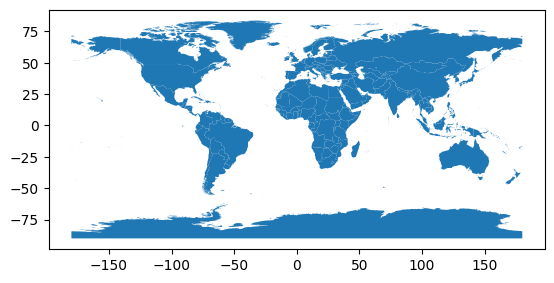

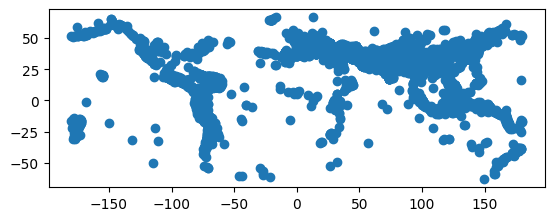

In [3]:
#Reading an dplotting the polgyon
country_poly = gpd.read_file(r"D:\IIST-MTECH\SCA\python lab\Lab6\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp")
eq_point = gpd.read_file(r"D:\IIST-MTECH\SCA\python lab\Lab6\Earthquake\Earthquake.shp")

country_poly.plot()
eq_point.plot()


In [4]:
print(country_poly.crs,eq_point.crs)

epsg:4326 epsg:4326


In [5]:
#Number of features in country 
country_poly.size/country_poly.columns.size

255.0

In [6]:
#Number of features in earthquake
eq_point.size/eq_point.columns.size

5836.0

In [7]:
eq_point.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
eq_point.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 0.98, 'Earthquakes')

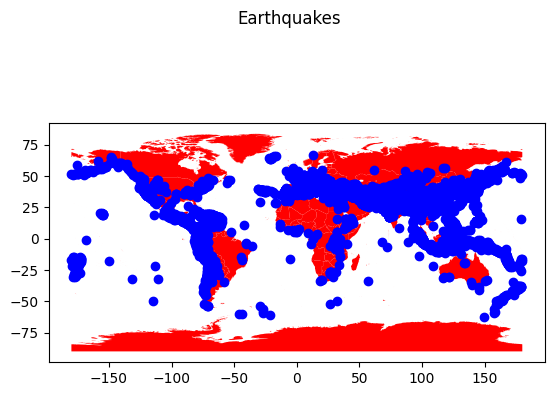

In [9]:
#Plotting two layes on one layer- two layers are in same projection
fig,ax= plt.subplots()
country_poly.plot(ax=ax, color='red')
eq_point.plot(ax=ax, color='blue')
fig.suptitle('Earthquakes')

In [10]:
print(country_poly.crs,eq_point.crs)


epsg:4326 epsg:4326


In [11]:
#Number of earthquake points in each country
PointInPolys = gpd.tools.sjoin( eq_point, country_poly, predicate="within", how='left')


In [13]:
PointInPolys.to_csv(r"D:\IIST-MTECH\SCA\python lab\Lab6\op.csv")
eq_by_country = PointInPolys.groupby(['COUNTRY'])['COUNTRY'].count()
df_eq = eq_by_country.to_frame()
df_eq

,COUNTRY
COUNTRY,
AFGHANISTAN,54
ALBANIA,53
ALGERIA,55
ANTARCTICA,4
ANTIGUA AND BARBUDA,3
...,...
VANUATU,51
VENEZUELA,62
VIETNAM,1


In [15]:
country_max = df_eq.loc[df_eq['COUNTRY'].idxmax()]
country_max

COUNTRY    574
Name: CHINA, dtype: int64

In [23]:
country_poly = country_poly.to_crs('epsg:4326')

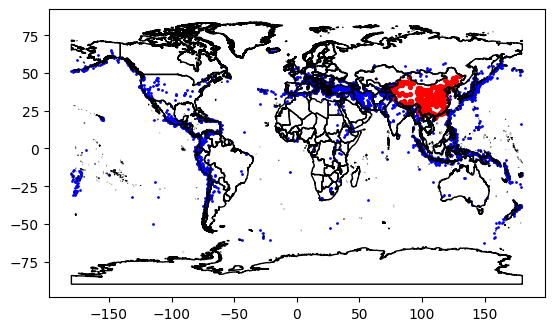

In [17]:
#Plotting the output
pnt_eq = eq_point[PointInPolys.SOVEREIGNT=='China']
base = country_poly.boundary.plot(linewidth=1, edgecolor="black")
eq_point.plot(ax=base, linewidth=1, color="blue", markersize=1)
pnt_eq.plot(ax=base, linewidth=1, color="red", markersize=8)
plt.show()

2. Spatial Querying

<AxesSubplot: >

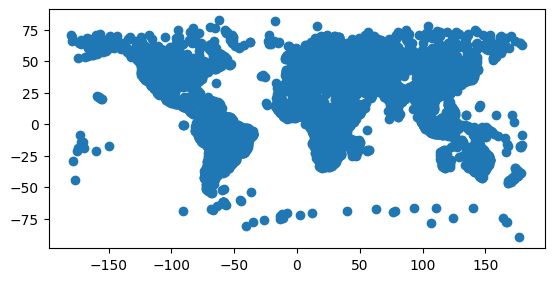

In [21]:
#Creating geodataframe objects to play with layers
popluated_places = gpd.read_file(r"D:/IIST-MTECH/SCA/python lab/Lab6/ne_10m_populated_places_simple")
popluated_places.plot()

<AxesSubplot: >

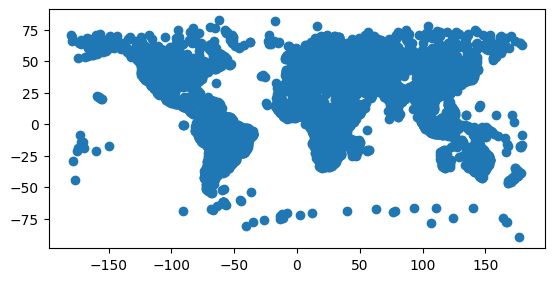

In [20]:
populated_places_prj = gpd.read_file(r"D:/IIST-MTECH/SCA/python lab/Lab6/ne_10m_populated_places_simple")
populated_places_prj.plot()

<AxesSubplot: >

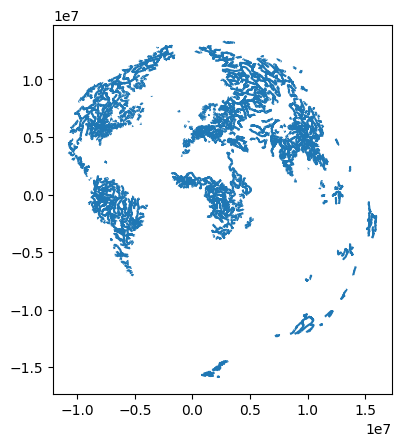

In [22]:
river_lake = gpd.read_file(r"D:\IIST-MTECH\SCA\python lab\Lab6\Projectedrivers")
river_lake.plot()

<AxesSubplot: >

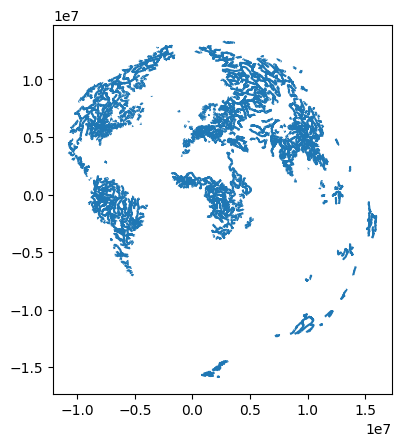

In [23]:
river_lake_prj = gpd.read_file(r"D:\IIST-MTECH\SCA\python lab\Lab6\Projectedrivers")
river_lake_prj.plot()

<AxesSubplot: >

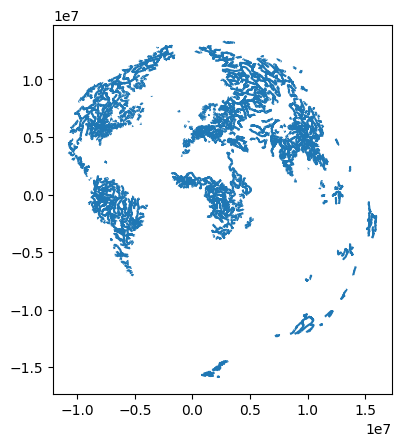

In [24]:
rivers_prj = gpd.read_file(r"D:\IIST-MTECH\SCA\python lab\Lab6\Projectedrivers")
rivers_prj.plot()

In [25]:
popluated_places.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
from geopandas import geodataframe
populated_places_prj.crs
gdf = geodataframe

In [27]:
populated_places_prj.size/populated_places_prj.columns.size

7343.0

In [31]:
rivers_prj.crs

<Derived Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
#River Buffer
buffer_river = rivers_prj.buffer(1000)
#Buffer for Populated places
buffer_pp = populated_places_prj.buffer(10000)

C:\Users\sriman\AppData\Local\Temp\ipykernel_6512\4279347143.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer_pp = populated_places_prj.buffer(10000)


In [35]:
PointsinPolys1 = gpd.tools.sjoin(populated_places_prj, buffer_river.to_frame(), predicate="within", how='left')

C:\Users\sriman\AppData\Local\Temp\ipykernel_6512\1730438575.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: ESRI:54032

  PointsinPolys1 = gpd.tools.sjoin(populated_places_prj, buffer_river.to_frame(), predicate="within", how='left')


In [36]:
rivers_prj.to_crs('EPSG:4326')

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio IrauÃ¡di,ÐÑÐ°Ð²Ð°Ð´Ð¸,Irrawaddy,Ä°ravadi Nehri,SÃ´ng Ayeyarwaddy,ä¼æ´ç¦åºæ±,2,1159109417,"MULTILINESTRING ((95.45110 17.82050, 95.42766 ..."
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Ð¢Ð¾Ð½Ð»ÐµÑÐ°Ð¿,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133..."
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Ð¢Ð¾Ð½Ð»ÐµÑÐ°Ð¿,None,None,None,None,4,1159109445,"LINESTRING (104.61476 12.38203, 104.61769 12.3..."
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Ð¨ÐµÐºÑÐ½Ð°,Sjeksna,None,None,èå æ¯ç´æ²³,4,1159109447,"LINESTRING (37.73951 59.07954, 37.75733 59.103..."
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Ð¨ÐµÐºÑÐ½Ð°,Sjeksna,None,None,èå æ¯ç´æ²³,4,1159109461,"LINESTRING (38.47804 59.21666, 38.48528 59.228..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,2049Lake Centerline,10.0,Lake Centerline,Ohau,None,2049,None,7.2,Ohau,8.2,...,None,None,None,None,None,None,None,4,1159129657,"LINESTRING (170.19260 -44.34343, 170.20050 -44..."
1451,219River,6.0,River,Po,None,219,Version 4 edit,5.0,Po,6.0,...,Pad,Rio PÃ³,ÐÐ¾,Po,Po Nehri,SÃ´ng Po,æ³¢æ²³,4,1159129663,"MULTILINESTRING ((7.64746 44.83906, 7.61408 44..."
1452,178River,5.0,River,Loire,None,178000,Changed in 2.0,4.7,Loire,5.7,...,Loara,Rio Loire,ÐÑÐ°ÑÐ°,Loire,Loire Nehri,SÃ´ng Loire,å¢ç¦å°æ²³,4,1159129671,None
1453,178River,5.0,River,Loire,None,178,Changed in 4.0,4.7,Loire,5.7,...,Loara,Rio Loire,ÐÑÐ°ÑÐ°,Loire,Loire Nehri,SÃ´ng Loire,å¢ç¦å°æ²³,4,1159129677,"MULTILINESTRING ((3.07819 46.98509, 3.07171 46..."


In [41]:
#Intersection
res_intersection = buffer_river.to_frame().overlay(buffer_pp.to_frame(), how='intersection')
res_intersection

d:\Python\lib\site-packages\geopandas\geodataframe.py:2323: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: ESRI:54032
Right CRS: EPSG:4326

  return geopandas.overlay(


,0


In [42]:
#Saving as kml file
fiona.supported_drivers['KML'] = 'rw'
buffer_river.to_file(r'D:\IIST-MTECH\SCA\python lab\Lab6\BR1.kml', driver='KML')
buffer_pp.to_file(r'D:\IIST-MTECH\SCA\python lab\Lab6\BPP.kml', driver='KML')
res_intersection.to_file(r'D:\IIST-MTECH\SCA\python lab\Lab6\output1.kml', driver='KML')

d:\Python\lib\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
